# Titanic survived Project

In [78]:
# importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# loading the dataset 
df = pd.read_csv('Titanic_survived_project.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# checking the shape 
df.shape

(891, 12)

In [4]:
# checking only the col names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# checking all the unique values present in the dataset for finding all the null or blank values
for i in df.columns:
    print(df[i].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [8]:
# dropping the 'Cabin' col since it has 77 % of null values so we can't fill this much values it would affect the model negatively
df.drop('Cabin', axis = 1, inplace = True)

In [9]:
# replacing all the null values of 'Age' col with its mean values
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [10]:
df['Age'].isnull().sum()

0

In [11]:
# converting 'Embarked' col into numeric col ie 1 for S, 2 for C and 3 for Q
df['Embarked_numeric'] = df['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})

# dropping the 'Embarked' col since it has been converted
df.drop('Embarked', axis = 1, inplace = True)

# checking the info of col
df['Embarked_numeric'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked_numeric
Non-Null Count  Dtype  
--------------  -----  
889 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [12]:
# counting the values which is present in more quantity
df['Embarked_numeric'].value_counts()

Embarked_numeric
1.0    644
2.0    168
3.0     77
Name: count, dtype: int64

In [13]:
# here we can see that 1 ie 'S' is coming max times so we will replace the NaN values of 'Embarked_numeric' with it
df['Embarked_numeric'].fillna(1.0, inplace = True)

# checking the null values
df['Embarked_numeric'].isnull().sum()

0

In [14]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked_numeric    0
dtype: int64

<Axes: >

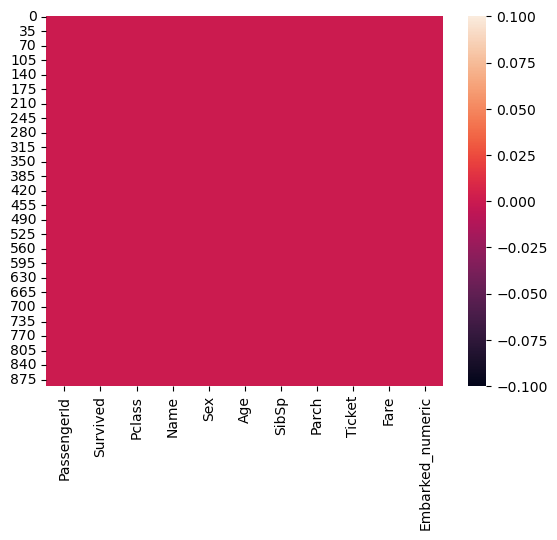

In [15]:
# checking the heatmap
sns.heatmap(df.isnull())

In [16]:
df.drop('Name', axis = 1, inplace = True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_numeric
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,1.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,1.0
4,5,0,3,male,35.0,0,0,373450,8.0500,1.0


In [18]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [19]:
# dropping the 'Ticket' col
df.drop('Ticket', axis = 1, inplace = True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_numeric
0,1,0,3,male,22.0,1,0,7.2500,1.0
1,2,1,1,female,38.0,1,0,71.2833,2.0
2,3,1,3,female,26.0,0,0,7.9250,1.0
3,4,1,1,female,35.0,1,0,53.1000,1.0
4,5,0,3,male,35.0,0,0,8.0500,1.0


In [21]:
# converting the 'Sex' col into a numeric col
df['Sex_numeric'] = df['Sex'].replace({'male': 1, 'female': 0})

# dropping the previous 'Sex' col since we have already converted it
df.drop('Sex', axis = 1, inplace = True)

# checking the info of col
df['Sex_numeric'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex_numeric
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [22]:
# checking the unique values present in col
df['Sex_numeric'].unique()

array([1, 0], dtype=int64)

In [23]:
# checking the info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Age               891 non-null    float64
 4   SibSp             891 non-null    int64  
 5   Parch             891 non-null    int64  
 6   Fare              891 non-null    float64
 7   Embarked_numeric  891 non-null    float64
 8   Sex_numeric       891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [24]:
# our target col is 'Survived' so we have to bring it at the last index 
Survived = df.pop('Survived')
df['Survived'] = Survived


<Axes: >

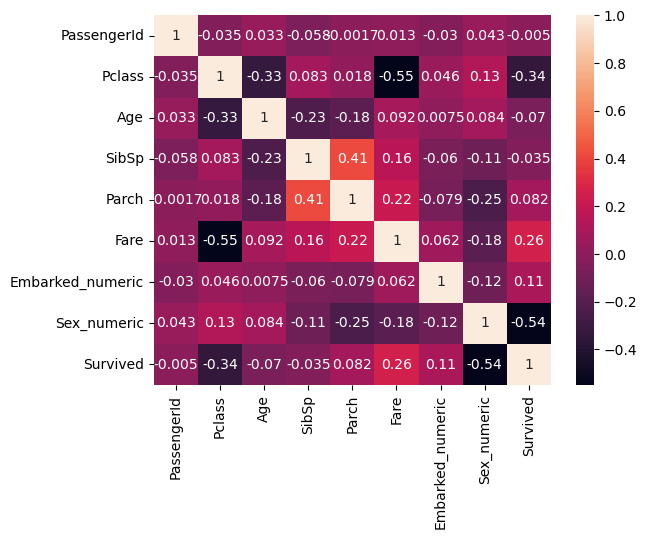

In [25]:
# checking the correlation between each cols by plotting the heatmatp
sns.heatmap(df.corr(), annot = True)

In [26]:
# checking the df stats using describe method
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_numeric,Sex_numeric,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,1.361392,0.647587,0.383838
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429,0.635673,0.477990,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,1.000000,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000,1.000000


In [27]:
# dropping the 'PassengerId' col 
df.drop('PassengerId', axis = 1, inplace = True)

In [28]:
# checking the skewness
df.skew()

Pclass             -0.630548
Age                 0.434488
SibSp               3.695352
Parch               2.749117
Fare                4.787317
Embarked_numeric    1.543397
Sex_numeric        -0.618921
Survived            0.478523
dtype: float64

In [29]:
# reducing skewness by using cube root method 
df['SibSp'] = np.cbrt(df['SibSp'])
df['Parch'] = np.cbrt(df['Parch'])
df['Fare'] = np.cbrt(df['Fare'])
df['Embarked_numeric'] = np.cbrt(df['Embarked_numeric'])

In [30]:
# rechecking the skewness
df.skew()

Pclass             -0.630548
Age                 0.434488
SibSp               1.033059
Parch               1.348334
Fare                1.230382
Embarked_numeric    1.334532
Sex_numeric        -0.618921
Survived            0.478523
dtype: float64

## Visualization

### Univariate Analysis

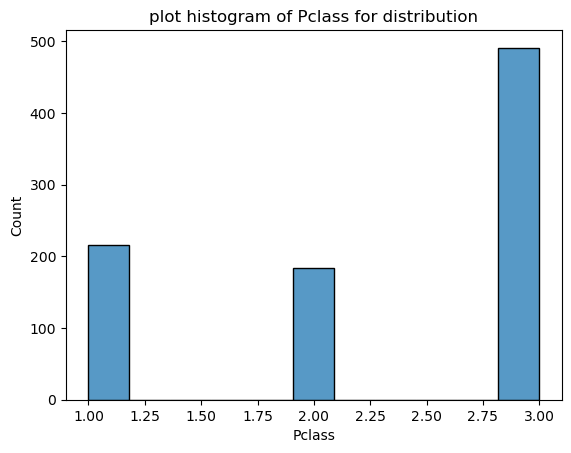

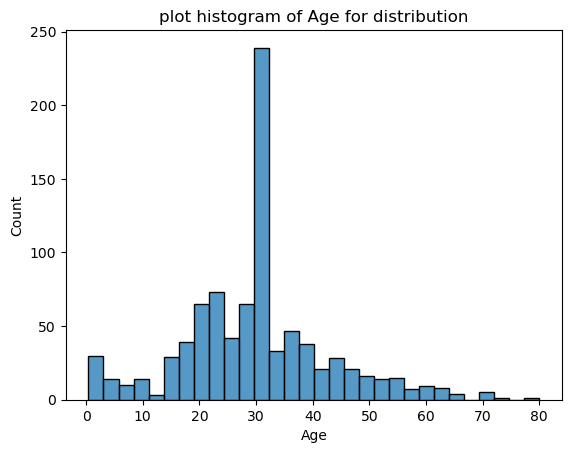

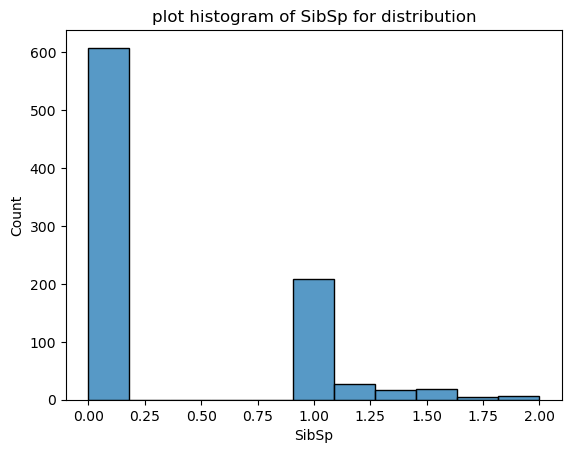

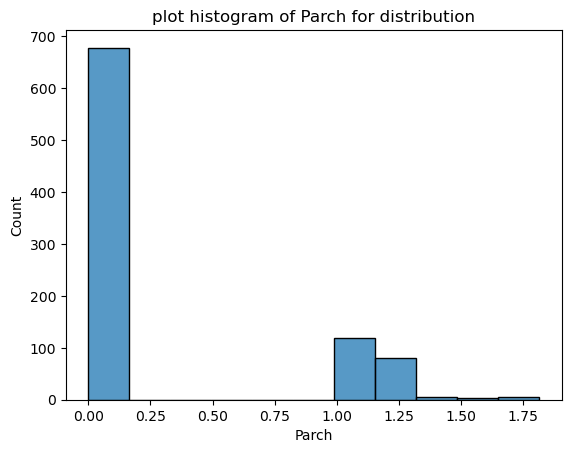

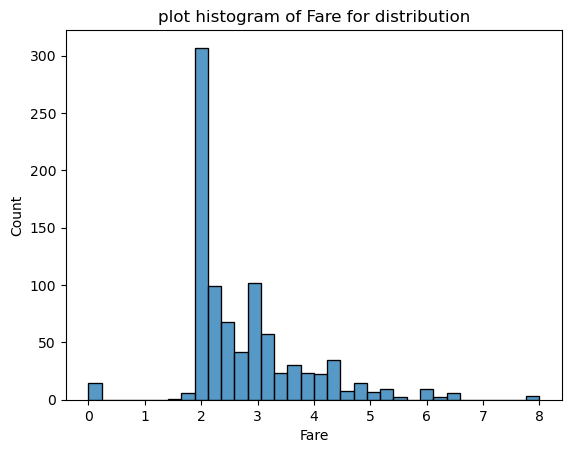

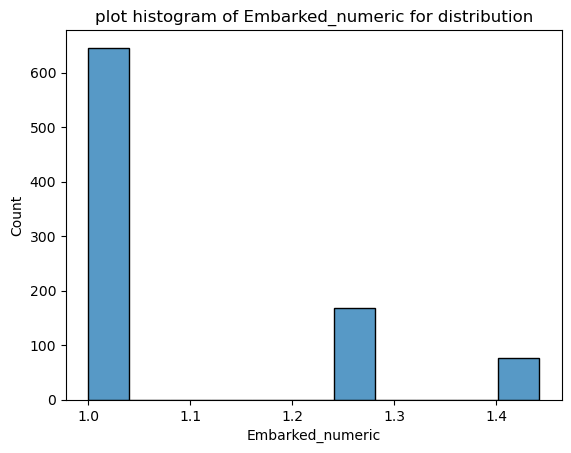

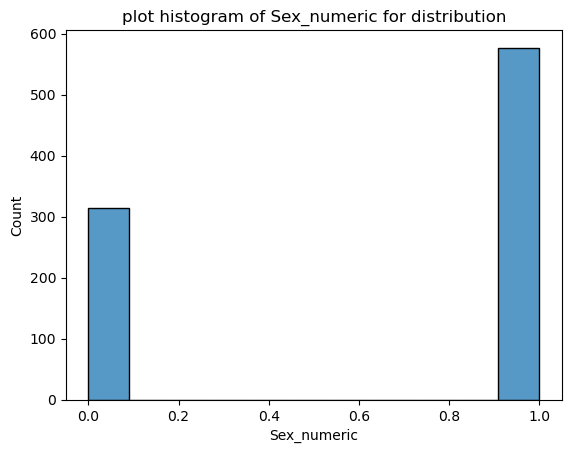

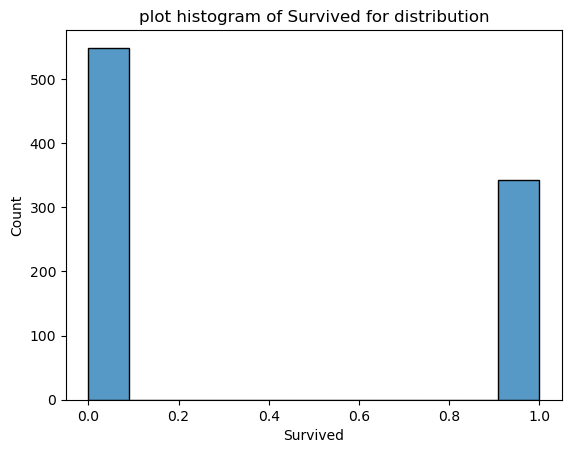

In [31]:
# checking each cols distribution by plotting the histogram
for i in df.columns:
    
    plt.title(f'plot histogram of {i} for distribution')
    sns.histplot(df[i])
    plt.show()

Sex_numeric
1    577
0    314
Name: count, dtype: int64


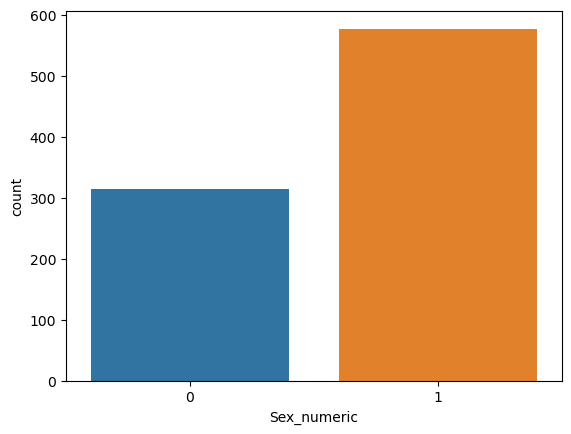

In [32]:
# checking the number of males and females present
sns.countplot(x = 'Sex_numeric', data = df)
print(df['Sex_numeric'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


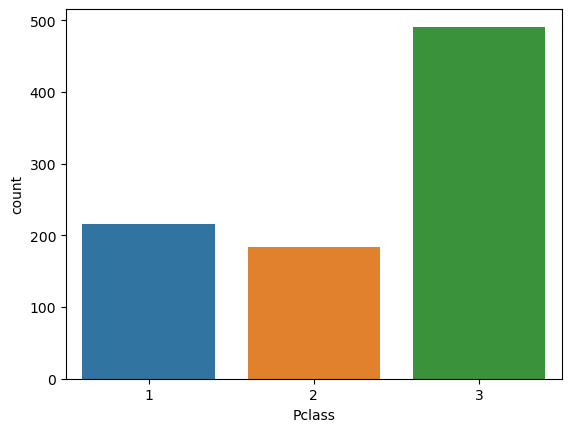

In [33]:
# checking the different passengers classes which were present using the countplot
sns.countplot(x = 'Pclass', data = df)
print(df['Pclass'].value_counts())

SibSp
0.000000    608
1.000000    209
1.259921     28
1.587401     18
1.442250     16
2.000000      7
1.709976      5
Name: count, dtype: int64


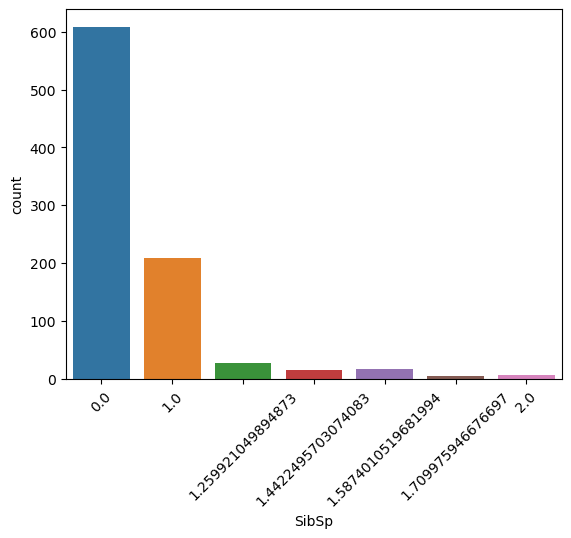

In [34]:
# checking the Siblings or Spouses abroad present by plotting the count plot
sns.countplot(x = 'SibSp', data = df)
plt.xticks(rotation = 45)
print(df['SibSp'].value_counts())

In [35]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_numeric,Sex_numeric,Survived
0,3,22.0,1.0,0.0,1.935438,1.000000,1,0
1,1,38.0,1.0,0.0,4.146318,1.259921,0,1
2,3,26.0,0.0,0.0,1.993730,1.000000,0,1
3,1,35.0,1.0,0.0,3.758647,1.000000,0,1
4,3,35.0,0.0,0.0,2.004158,1.000000,1,0


## Bivariate Analysis

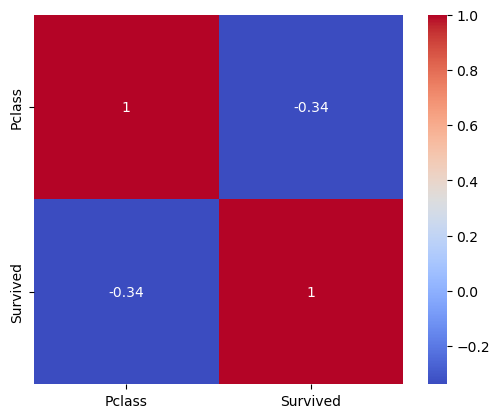

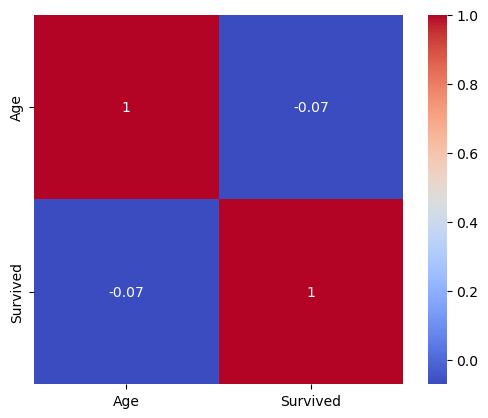

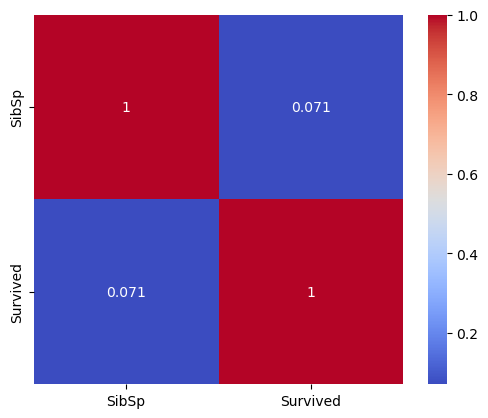

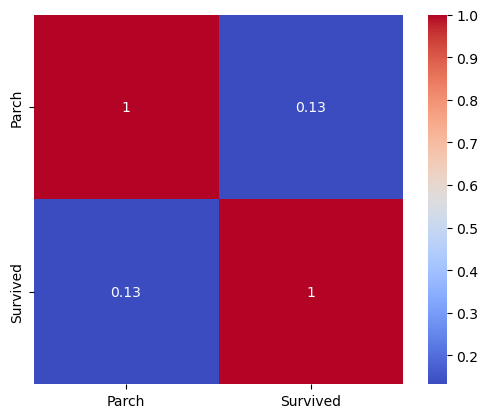

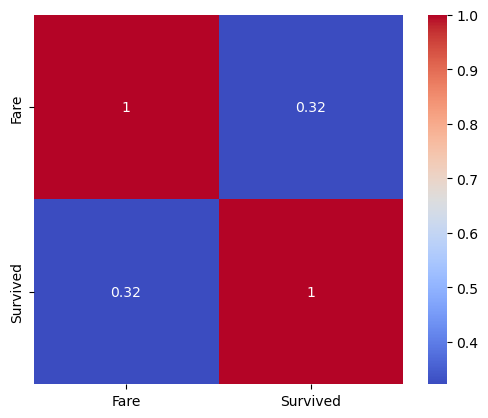

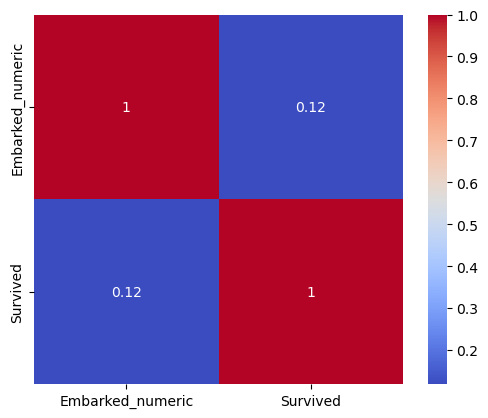

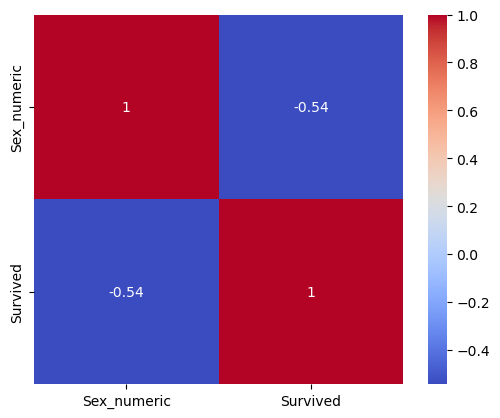

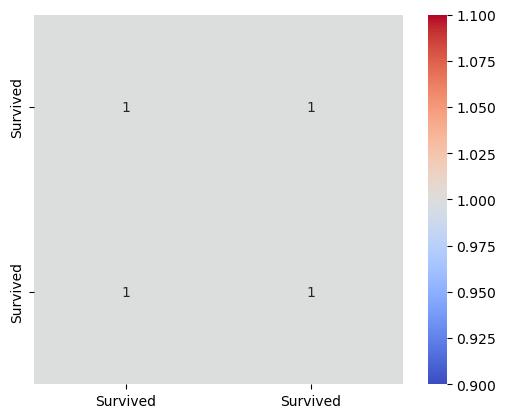

In [36]:
# checking the correlations of 'Survived' col with all the cols present in df
for i in df.columns:
    sns.heatmap(df[[i,'Survived']].corr(), annot = True, cmap = 'coolwarm', square = True)
    plt.show()

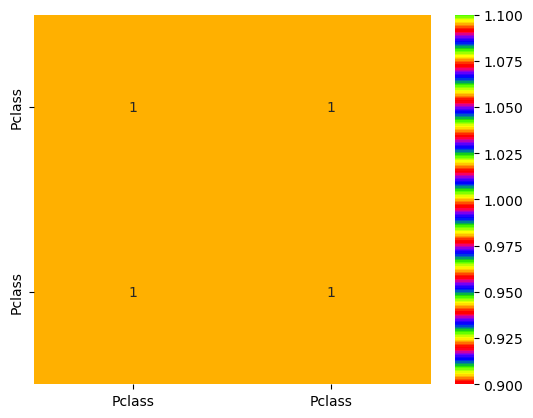

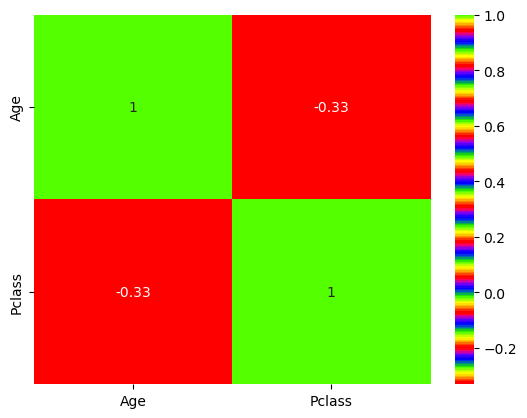

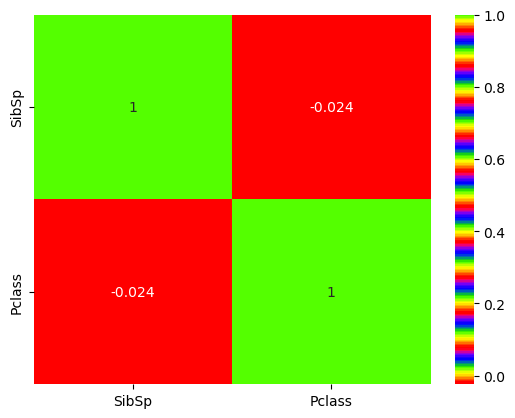

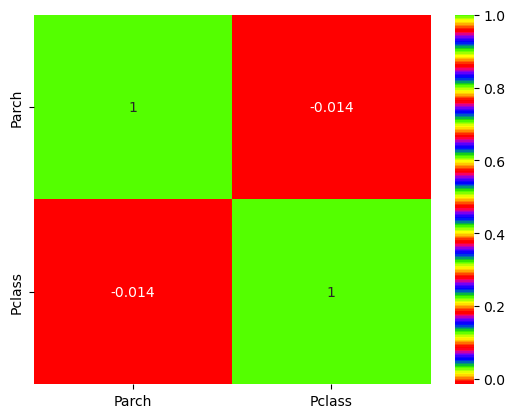

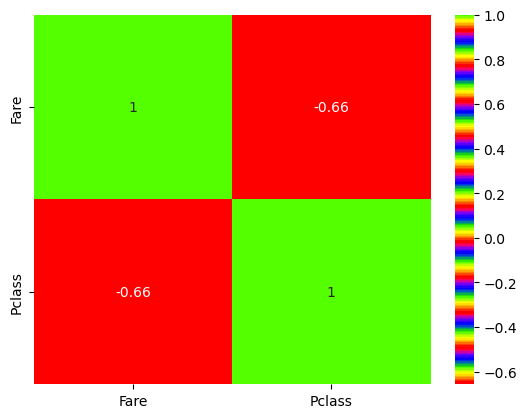

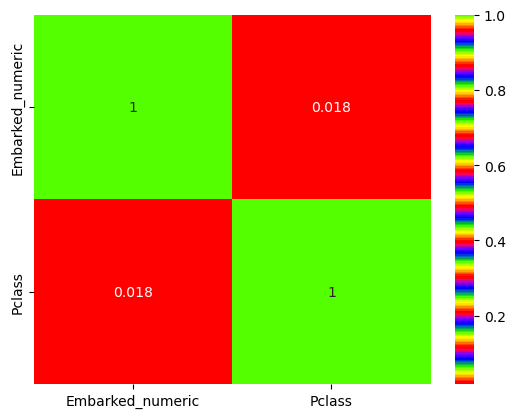

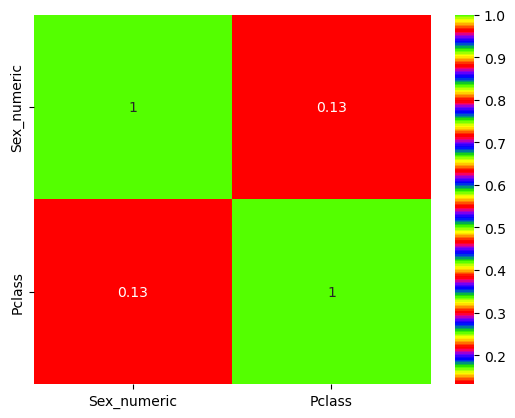

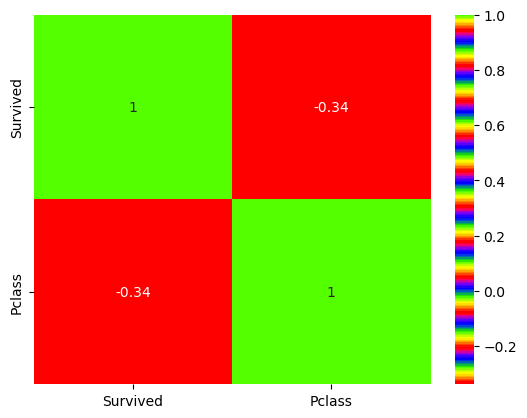

In [37]:
# checking the correlations of 'Pclass' col with all the cols present in df
for i in df.columns:
    sns.heatmap(df[[i,'Pclass']].corr(), annot = True, cmap = 'prism')
    plt.show()

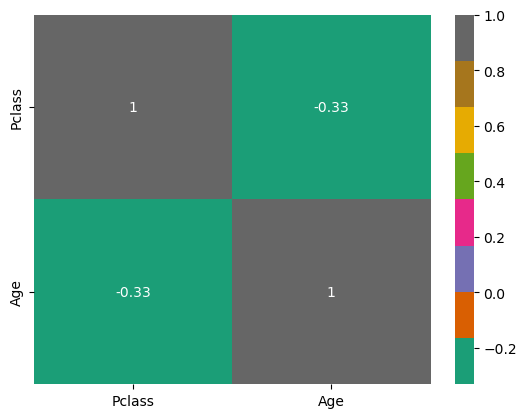

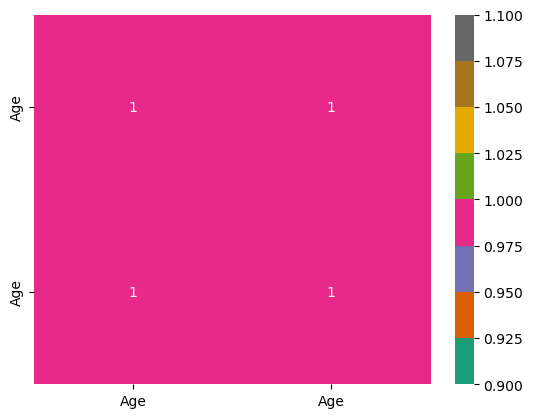

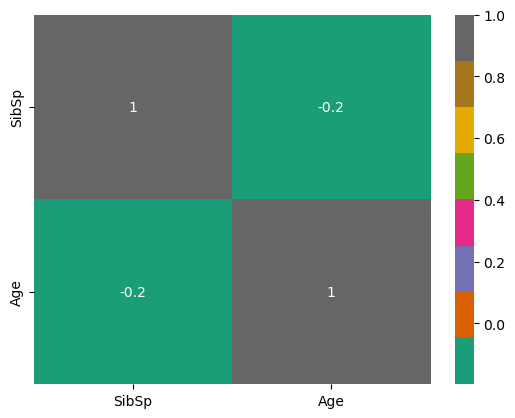

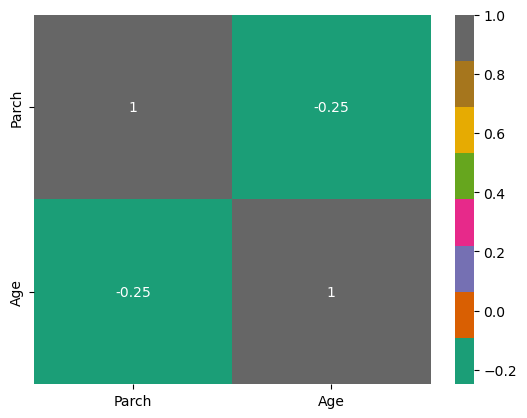

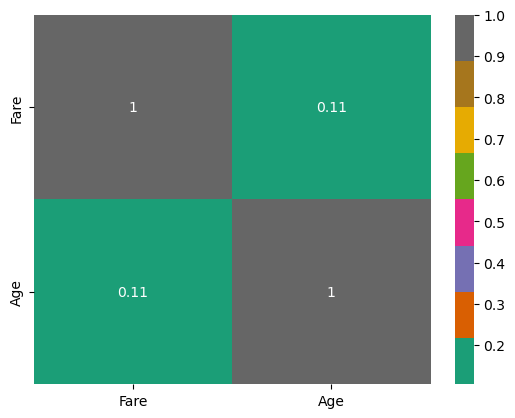

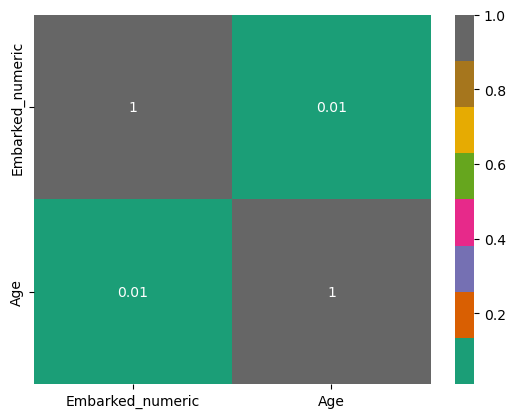

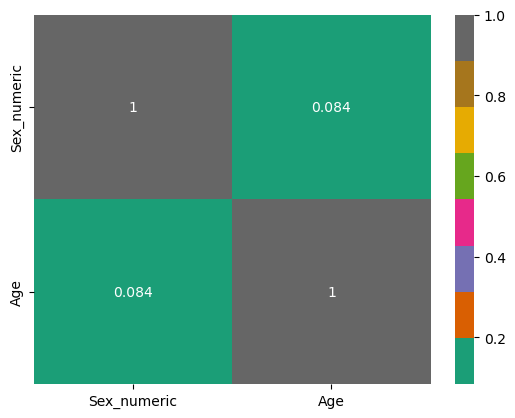

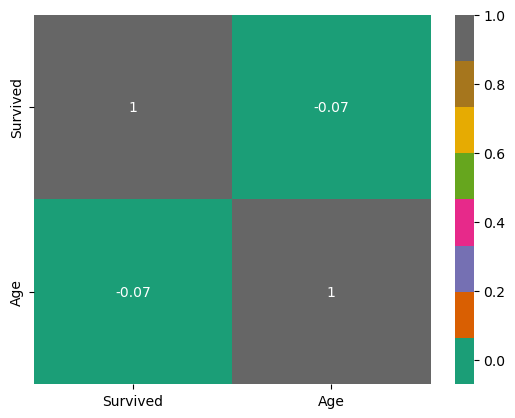

In [40]:
# checking the correlations of 'Age' col with all the cols present in df
for i in df.columns:
    sns.heatmap(df[[i,'Age']].corr(), cmap = 'Dark2', annot = True)
    plt.show()

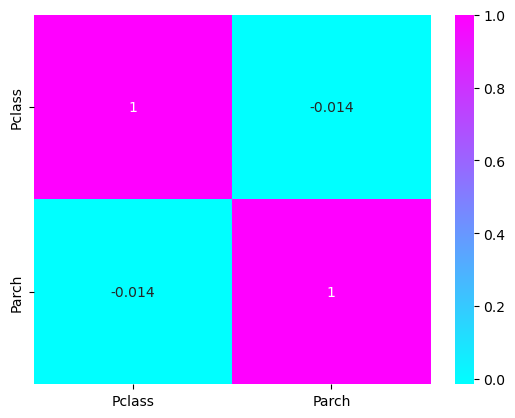

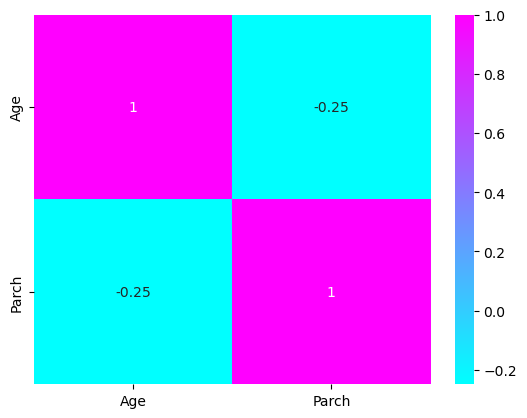

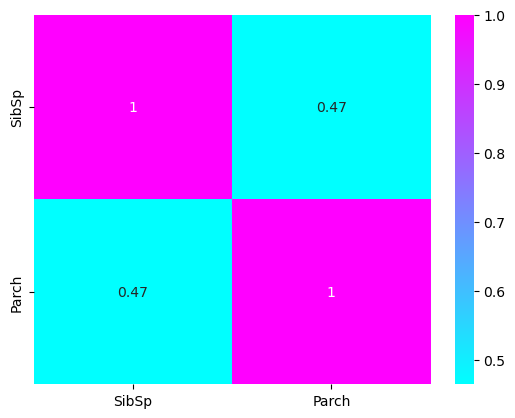

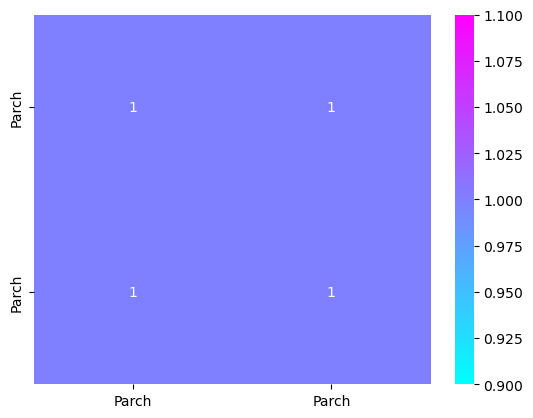

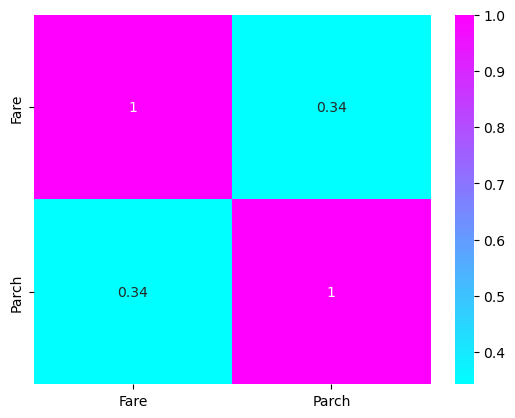

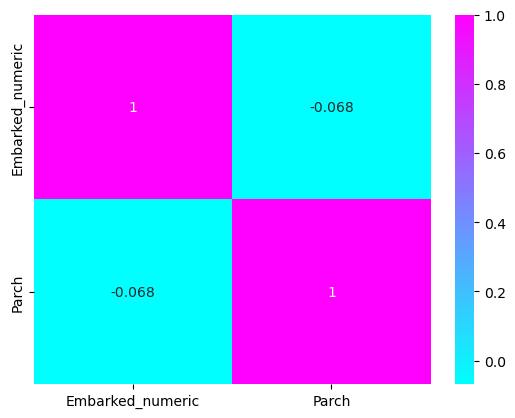

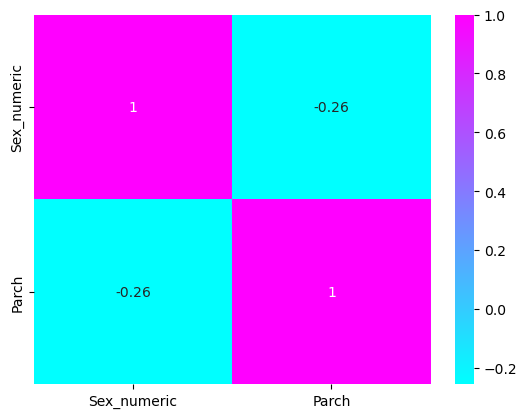

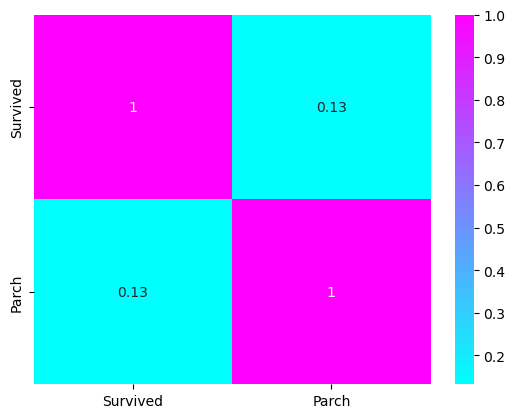

In [46]:
# checking the correlations of 'Parch' col with all the cols present in df
for i in df.columns:
    sns.heatmap(df[[i,'Parch']].corr(), annot = True, cmap = 'cool')
    plt.show()

## Multivariate Analysis

C:\Users\andyt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


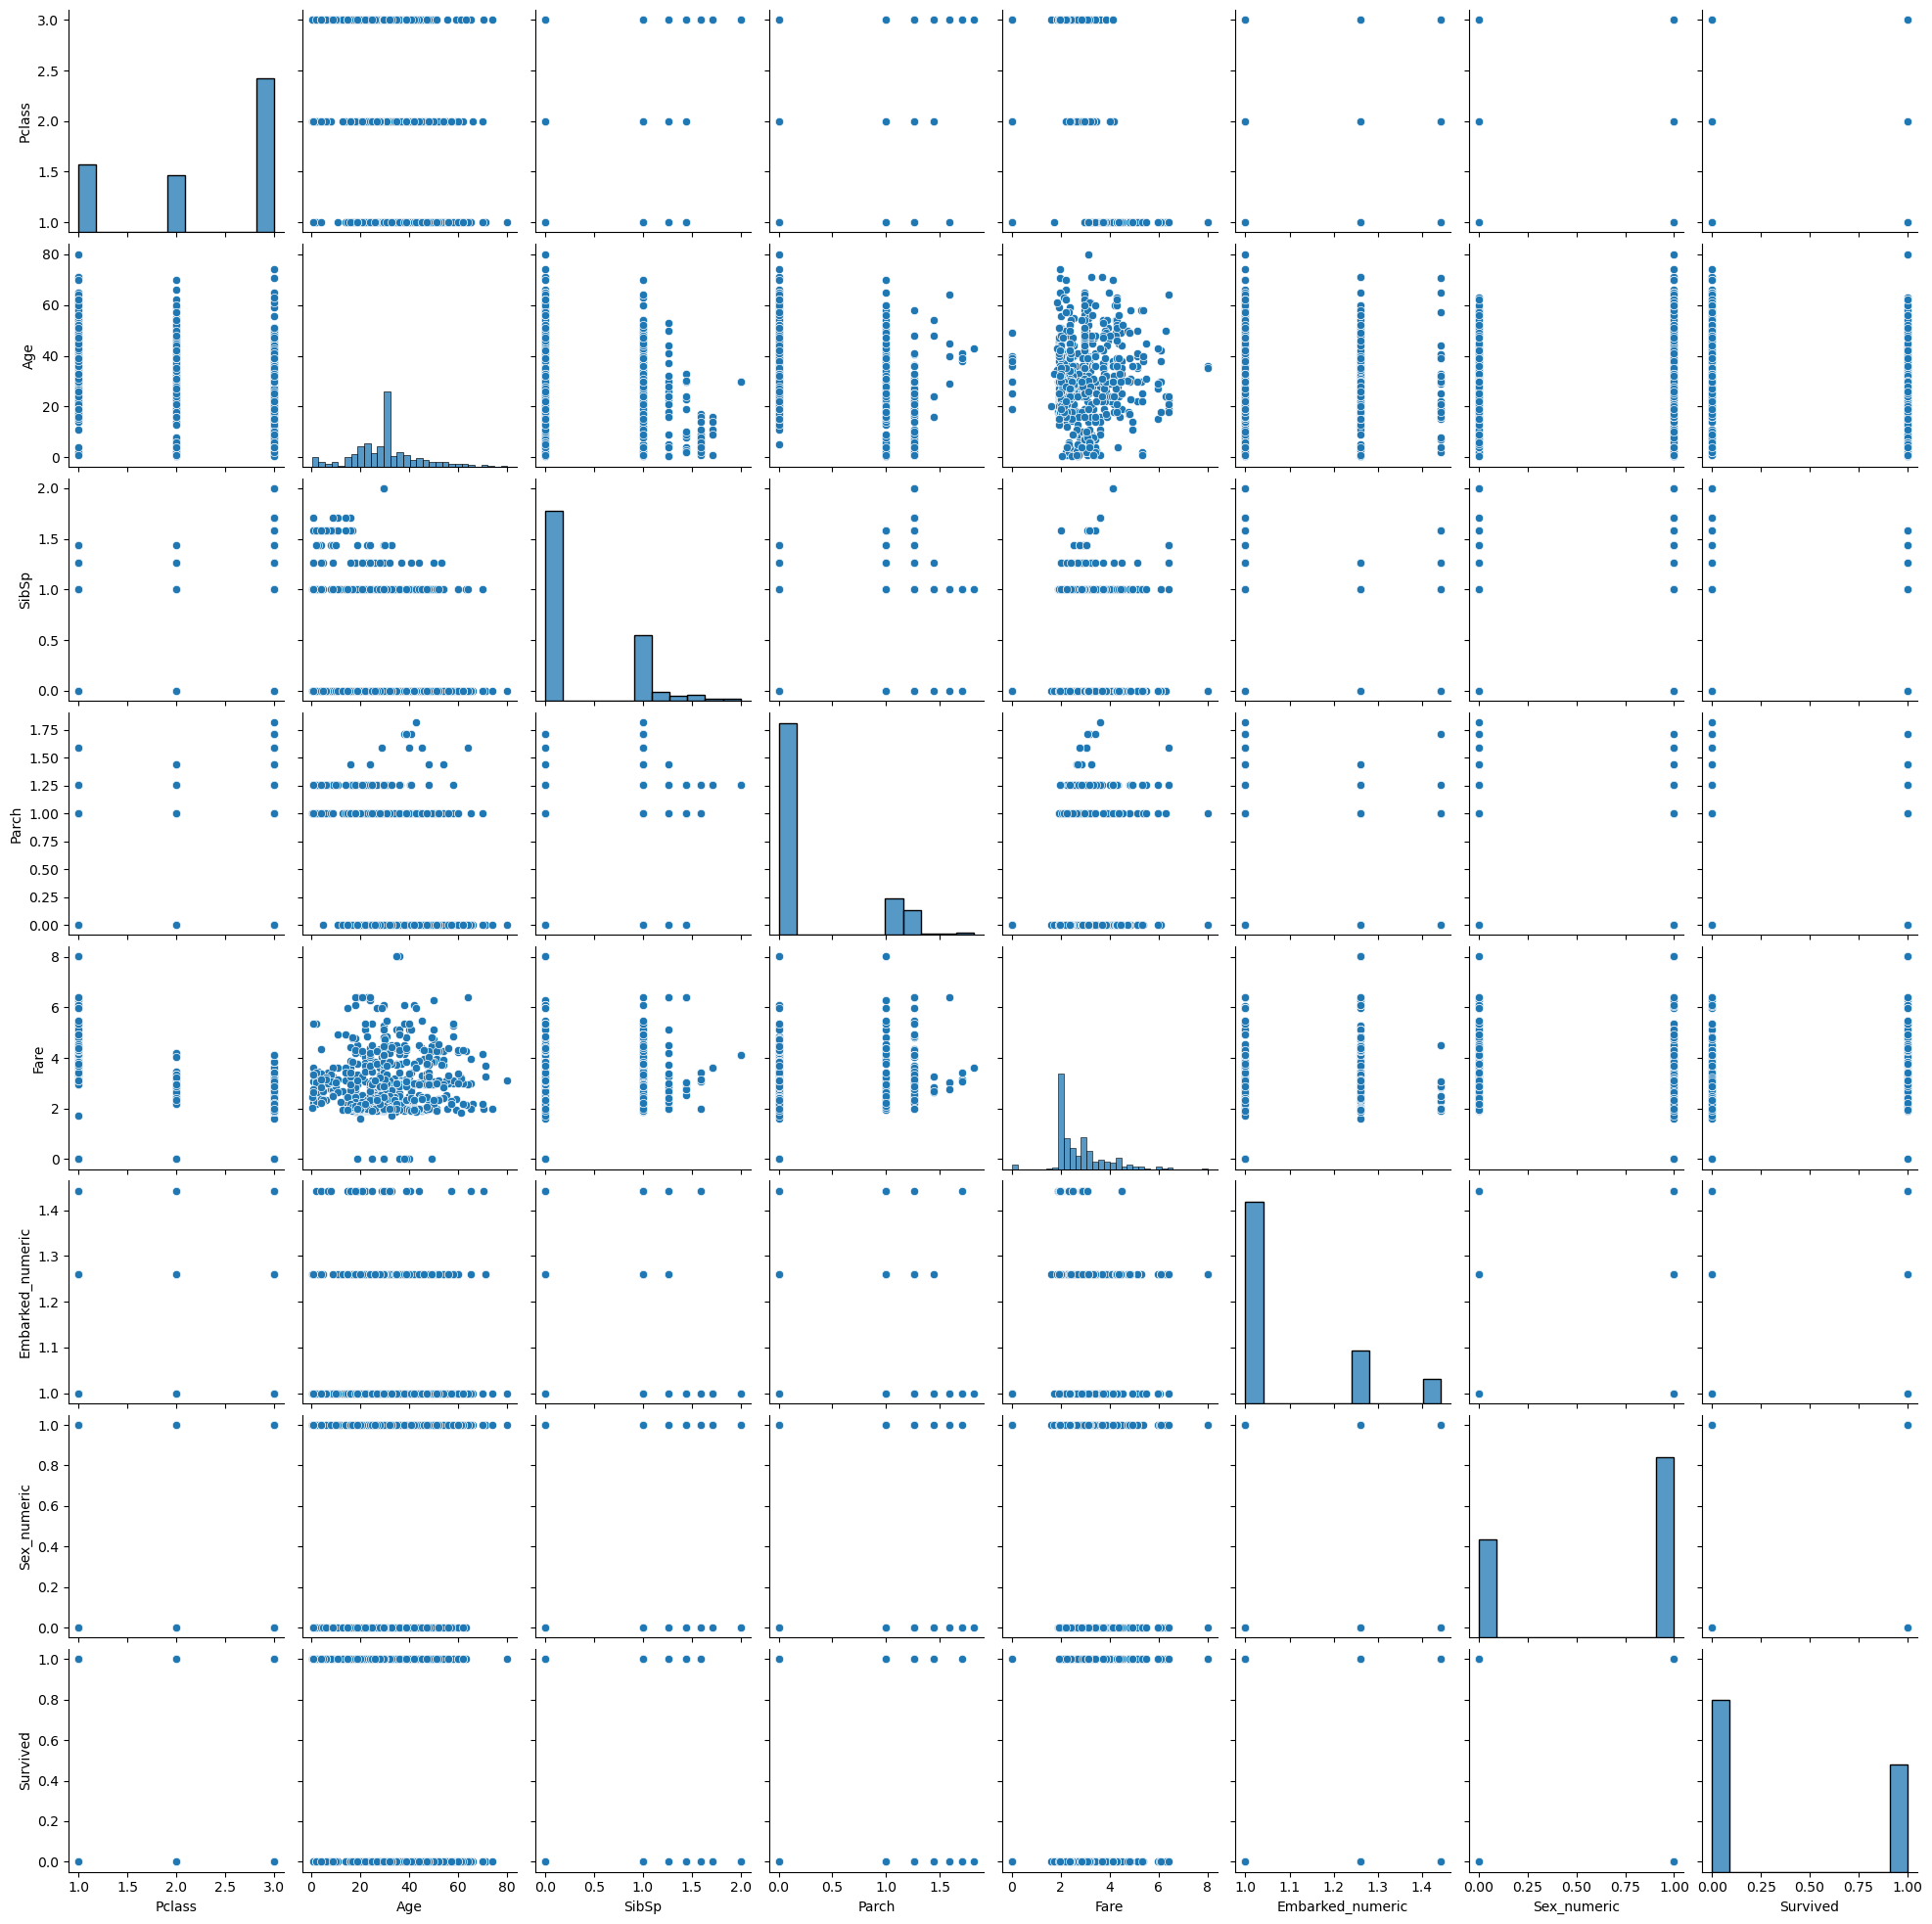

In [47]:
# comparing each and every cols of df with each other by plotting the pair plot
sns.pairplot(df)
plt.show()

## checking the outlier

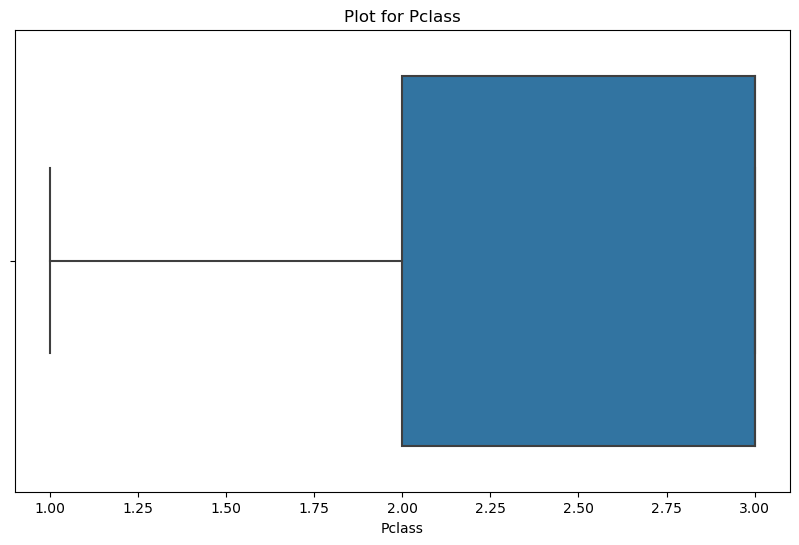

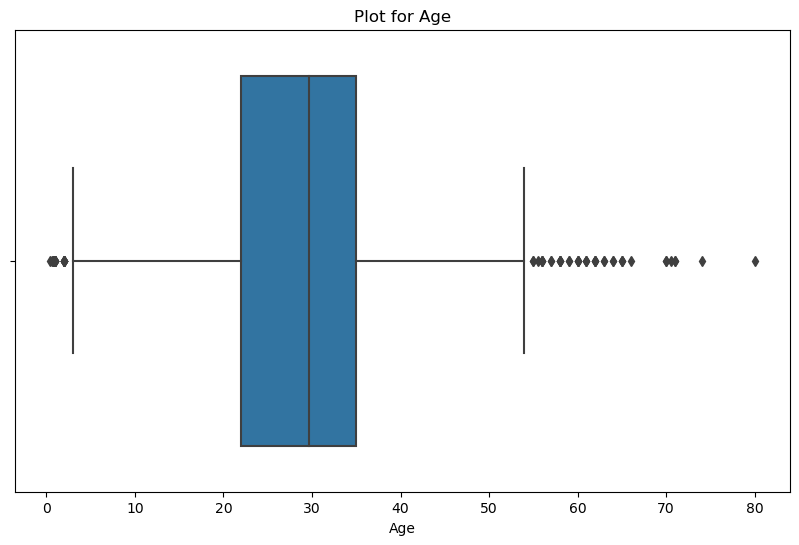

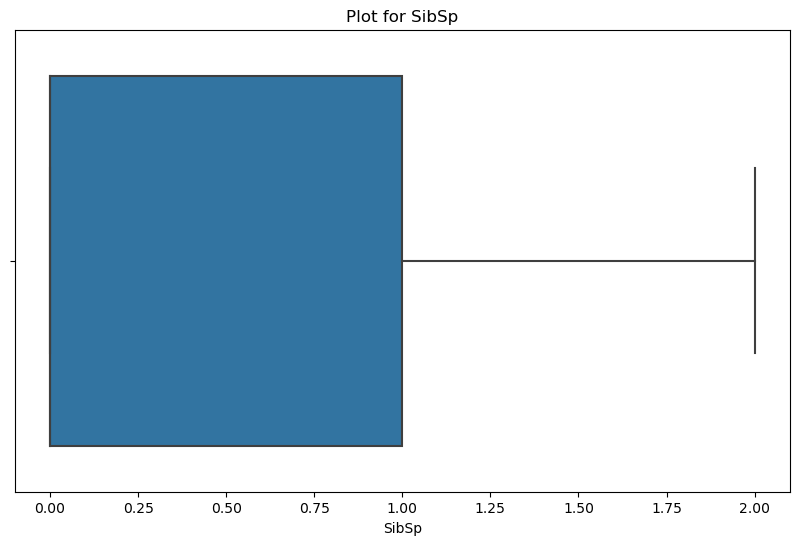

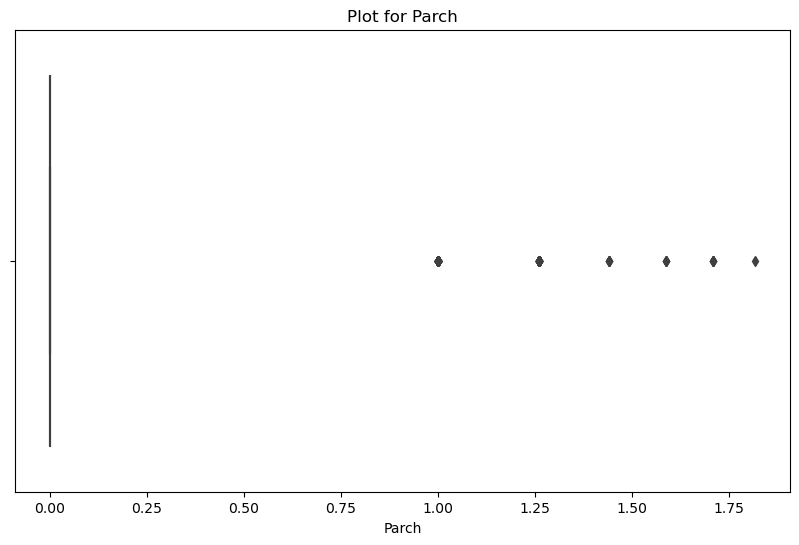

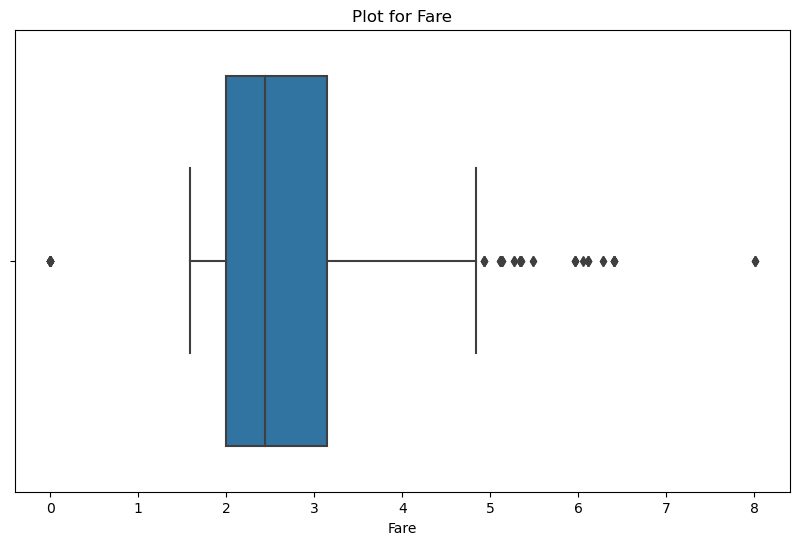

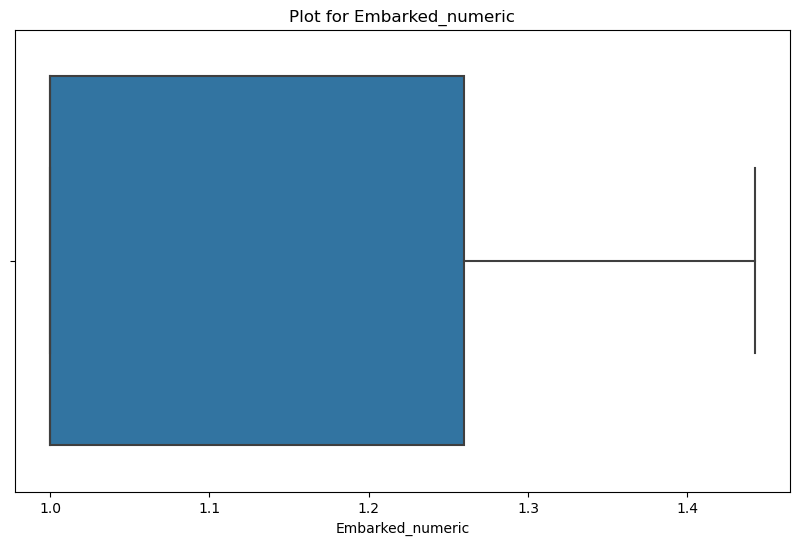

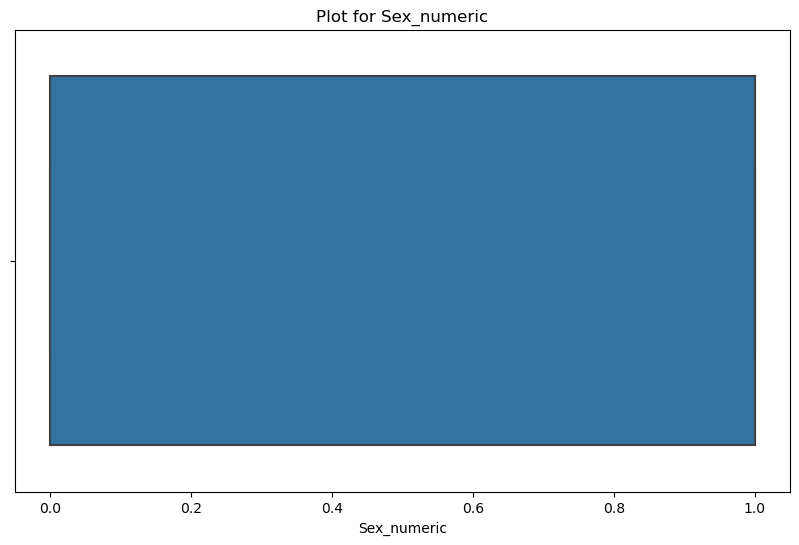

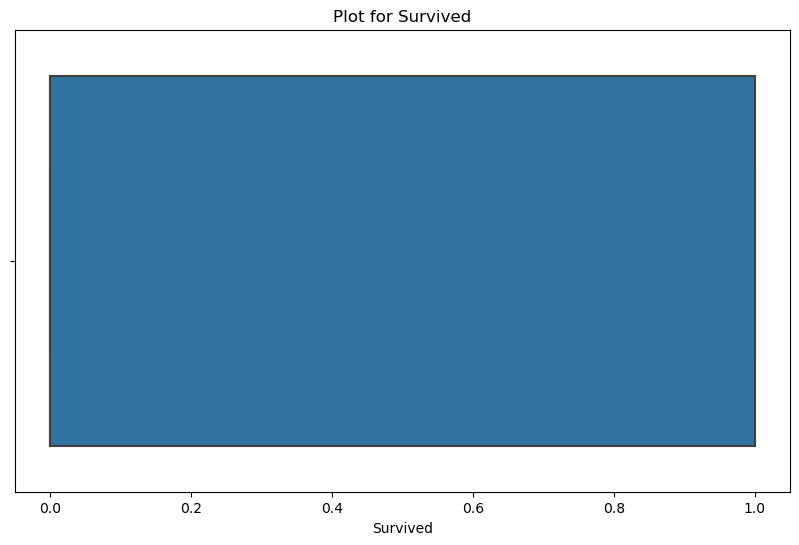

In [48]:
# checking the outlier by plotting the box plot
for i in df.columns:
    plt.figure(figsize = (10, 6))
    sns.boxplot(x = df[i])
    plt.title(f'Plot for {i}')
    plt.show()

## Removing the outlier by using IQR (Interquartile)

In [49]:
# finding the 25th and 75th percentile
age_percentile25 = df['Age'].quantile(.25)
age_percentile75 = df['Age'].quantile(.75)

print(age_percentile25)
print(age_percentile75)

22.0
35.0


In [50]:
# finding the IQR
age_iqr = age_percentile75 - age_percentile25
age_iqr

13.0

In [51]:
# finding the upper and lower limit
age_upper = age_percentile75 + 1.5 * age_iqr
age_lower = age_percentile25 - 1.5 * age_iqr

print(age_upper)
print(age_lower)

54.5
2.5


### Capping

In [52]:
df['Age'] = np.where(
    df['Age'] > age_upper, age_upper,
    np.where(
        df['Age'] < age_lower, age_lower,
        df['Age']
    )
)

<Axes: >

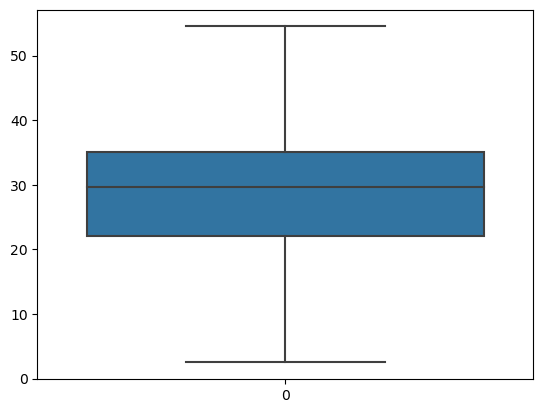

In [53]:
# rechecking the outlier
sns.boxplot(df['Age'])

### Now removing 'Parch' col's outlier

In [60]:
# finding the 25th and 75th percentile
parch_percentile25 = df['Parch'].quantile(.25)
parch_percentile75 = df['Parch'].quantile(.75)

parch_iqr = parch_percentile75 - parch_percentile25

print(parch_percentile25)
print(parch_percentile75)

0.0
0.0


In [63]:
upper = parch_percentile75 + 1.5 * parch_iqr
lower = parch_percentile25 - 1.5 * parch_iqr
print(upper)
print(lower)

0.0
0.0


In [64]:
# dropping the 'Parch' col because of outliers
df.drop('Parch', axis = 1, inplace = True)

### Removing outliers of 'Fare' col

In [66]:
# finding the 25th and 75th percentile
fare_percentile25 = df['Fare'].quantile(.25)
fare_percentile75 = df['Fare'].quantile(.75)

print(fare_percentile25)
print(fare_percentile75)

1.9925045288591225
3.141380652391393


In [67]:
# finding the IQR
fare_iqr = fare_percentile75 - fare_percentile25
fare_iqr

1.1488761235322706

In [68]:
# finding the upper and the lower limit 
fare_upper = fare_percentile75 + 1.5 * fare_iqr
fare_lower = fare_percentile25 - 1.5 * fare_iqr

print(fare_upper)
print(fare_lower)

4.864694837689799
0.2691903435607166


### Capping

In [69]:
df['Fare'] = np.where(
    df['Fare'] > fare_upper, fare_upper,
    np.where(
        df['Fare'] < fare_lower, fare_lower,
        df['Fare']
    )
)

<Axes: >

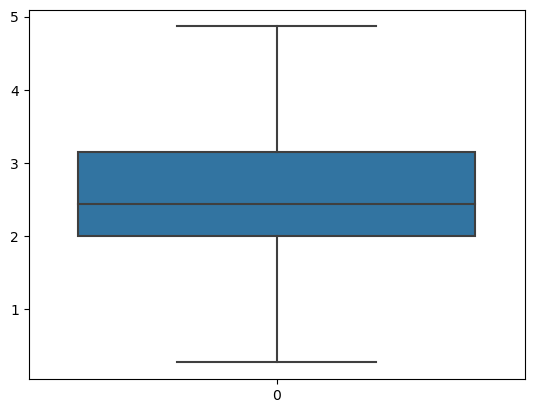

In [70]:
# rechecking the outliers 
sns.boxplot(df['Fare'])

## Creating model

In [72]:
# creating the x variable for storing input data
x = df.iloc[:,:-1]
x.head(2)

,Pclass,Age,SibSp,Fare,Embarked_numeric,Sex_numeric
0,3,22.0,1.0,1.935438,1.000000,1
1,1,38.0,1.0,4.146318,1.259921,0


In [74]:
# creating the y variable for storing output data
y = df.iloc[:,-1:]
y.head(2)

,Survived
0,0
1,1


In [75]:
# checking the shape of x and y
print(x.shape)
print(y.shape)

(891, 6)
(891, 1)


In [403]:
# splitting data for training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 46)

In [404]:
# checking the shape of x_train, x_test, y_train and y_test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 6)
(268, 6)
(623, 1)
(268, 1)


### Trying the Naive Bayes MultinomialNB

In [405]:
# calling the MultinomialNB class
mnb = MultinomialNB()
mnb

MultinomialNB()

In [406]:
# training the model using the fit method with x_train and y_train
mnb.fit(x_train, y_train)

C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [407]:
# prediction variable
predmnb = mnb.predict(x_test)
predmnb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [408]:
# checking the accuracy score
print(accuracy_score(y_test, predmnb))

0.7388059701492538


In [409]:
# checking the confusion matrix
print(confusion_matrix(y_test, predmnb))

[[150  10]
 [ 60  48]]


In [410]:
# checking the classification report
print(classification_report(y_test, predmnb))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       160
           1       0.83      0.44      0.58       108

    accuracy                           0.74       268
   macro avg       0.77      0.69      0.69       268
weighted avg       0.76      0.74      0.72       268



### Trying the Naive Bayes GaussianNB classifier

In [411]:
gnb = GaussianNB()
gnb

GaussianNB()

In [412]:
# training the model using fit method
gnb.fit(x_train, y_train)

C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [413]:
# prediction variablle
predgnb = gnb.predict(x_test)
predgnb

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1], dtype=int64)

In [414]:
# checking the accuracy score
print(accuracy_score(y_test, predgnb))

0.7649253731343284


In [415]:
# checking the confusion matrix
print(confusion_matrix(y_test, predgnb))

[[119  41]
 [ 22  86]]


In [416]:
# checking the classification report
print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       160
           1       0.68      0.80      0.73       108

    accuracy                           0.76       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.76      0.77       268



### Trying the Decision Tree Classifier

In [417]:
# calling the Decision Tree class
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [418]:
# training the model using fit method
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [419]:
# prediction variable
preddtc = dtc.predict(x_test)
preddtc

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [420]:
# checking the accuracy score
print(accuracy_score(y_test, preddtc))

0.8097014925373134


In [421]:
# checking the confusion matrix
print(confusion_matrix(y_test, preddtc))

[[135  25]
 [ 26  82]]


In [422]:
# checking the classification report
print(classification_report(y_test, preddtc))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       160
           1       0.77      0.76      0.76       108

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



### Trying the KNN classifier

In [423]:
# calling the KNN class
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [424]:
# training the model using fit method
knn.fit(x_train, y_train)

C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [425]:
# prediction variable
predknn = knn.predict(x_test)
predknn

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [426]:
# checking the accuracy score
print(accuracy_score(y_test, predknn))

0.753731343283582


In [427]:
# checking the confusion matrix
print(confusion_matrix(y_test, predknn))

[[137  23]
 [ 43  65]]


In [428]:
# checking the classification report
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       160
           1       0.74      0.60      0.66       108

    accuracy                           0.75       268
   macro avg       0.75      0.73      0.73       268
weighted avg       0.75      0.75      0.75       268



### Trying the Support Vector Machine classifier

In [429]:
# calling the SVC class
svc = SVC()
svc

SVC()

In [430]:
# training the model using the fit method
svc.fit(x_train, y_train)

C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [431]:
# prediction variable
predsvc = svc.predict(x_test)
predsvc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [432]:
# checking the accuracy score
print(accuracy_score(y_test, predsvc))

0.6268656716417911


In [433]:
# checking the confusion matrix
print(confusion_matrix(y_test, predsvc))

[[160   0]
 [100   8]]


In [434]:
# checking the classification report
print(classification_report(y_test, predsvc))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       160
           1       1.00      0.07      0.14       108

    accuracy                           0.63       268
   macro avg       0.81      0.54      0.45       268
weighted avg       0.77      0.63      0.51       268



In [447]:
# test by taking an input data
def pred_dtc(t):
    t = t.reshape(1, -1)
    p = dtc.predict(t)
    print(t)
    if p == 0:
        print('The passenger will not Survive!!!')
    elif p == 1:
        print('The passenger will Survive!!!')

In [448]:
t = np.array([1,38.000000,1.0,4.146318,1.259921,0])
pred_dtc(t)

[[ 1.       38.        1.        4.146318  1.259921  0.      ]]
The passenger will Survive!!!


C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
